In [ ]:
import pandas as pd
from fbprophet import Prophet


In [ ]:
!wget https://raw.githubusercontent.com/curiousily/Deep-Learning-For-Hackers/master/10.fundamental_algorithms.ipynb

--2020-06-10 08:43:45--  https://raw.githubusercontent.com/curiousily/Deep-Learning-For-Hackers/master/10.fundamental_algorithms.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1758449 (1.7M) [text/plain]
Saving to: ‘10.fundamental_algorithms.ipynb’

10.fundamental_algo 100%[===================>]   1.68M  8.19MB/s    in 0.2s    

2020-06-10 08:43:46 (8.19 MB/s) - ‘10.fundamental_algorithms.ipynb’ saved [1758449/1758449]



In [ ]:
data="https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv"

In [ ]:
df = pd.read_csv(data)
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [ ]:
# Python
m = Prophet()
m.fit(df)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.199274,7.491396,8.948810
3266,2017-01-16,8.524244,7.786395,9.236688
3267,2017-01-17,8.311615,7.578891,8.993352
3268,2017-01-18,8.144232,7.427605,8.874850
3269,2017-01-19,8.156091,7.385033,8.925437


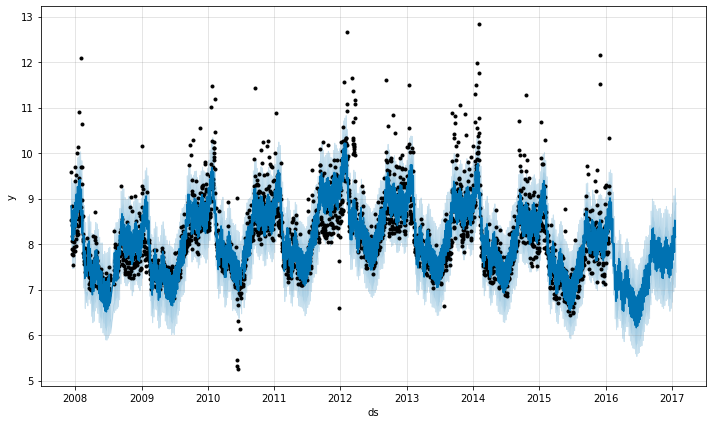

In [ ]:
fig1 = m.plot(forecast)


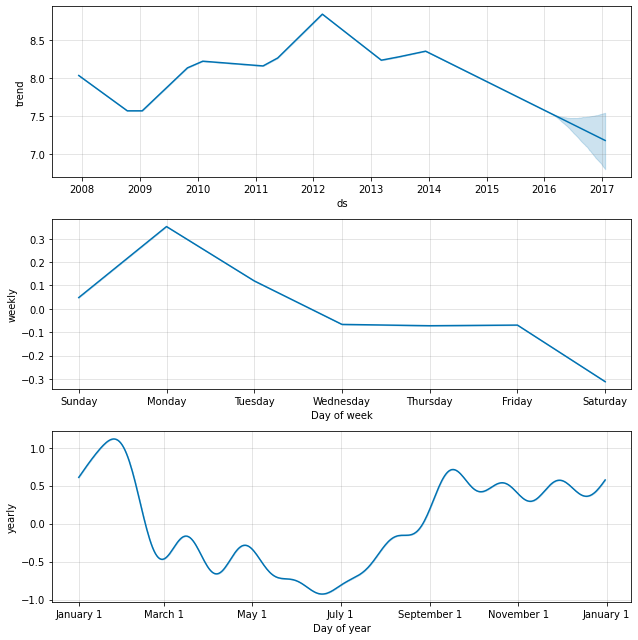

In [ ]:
fig2 = m.plot_components(forecast)


In [ ]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)